# Witful ML 04 - Model Evaluation for Linear Regression
by Kaan Kabalak, Editor In Chief @ witfuldata.com

# Introduction

Welcome to another chapter of Witful ML.

We have so far seen how to get an idea about how well our model performed. Yet, there ways which are much more reliable.

In this chapter we will learn about R2 (r-squared), MSE (mean squared error) and how these metrics measure model performance.

## Importing & Data Frame 

In [1]:
#Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Form a data frame
auto_df = pd.read_csv("auto.csv")
auto_df.head(5)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


## Instantiating, fitting and predictions

In [3]:
#X and y values
X = auto_df.drop(['mpg','origin'],axis=1).values
y = auto_df["mpg"].values

#Insantiating the model
lin_model = LinearRegression()

#Fitting the model
lin_model.fit(X,y)

#Predict
pred = lin_model.predict(X)

# R2 (R-squared)

R-squared is basically a metric that shows us how well our model's X values (and the regression line which was drawn in accordance with them) explains the variance of the target variable (y). It also shows us how better the regression line performs when compared to just drawing a line with the mean and trying to predict new data points that way.

The math formula for R2 is:
(var(mean)-var(line))/var(mean)

* var(mean) is the variation of the data points around a line that was drawn with the mean
* var (line) is the variation of the data points around the regression line. If our regline was drawn well enough, the data points around it won't have strayed far away; they will have a lower variation. So, less var(line) is better than more.

The closer R2 gets to 1, the better.

## R2, visually explained

I would like to explain R2, visually, through a model which uses car weight data to predict mpg(miles per gallon).

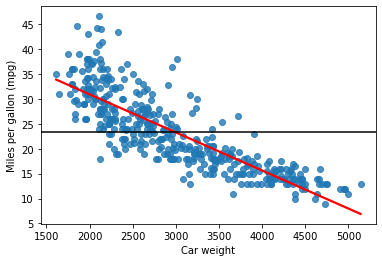

In [4]:
sns.regplot(x="weight",y="mpg",data=auto_df,ci=None,line_kws={"color":"red"})#Red regression line
plt.axhline(y=np.nanmean(auto_df.mpg),color="black")#Drawing a line with the mean of y
plt.xlabel("Car weight")
plt.ylabel("Miles per gallon (mpg)")
plt.show()

* The blue dots are the data points (x,y)
* The red line is a regression line
* The black line is the mean of y (mpg)
* In this visual, the distance between the blue dots and the black line stand for var(mean)
* In this visual, the distance between the blue dots and the red line stand for var(line)

Var(line) will be less than var(mean). This makes sense, right? The regression line is much closer to the data points than the mean line. That's actually one of the reasons why we go through all these processes to build a linear regression model. We want to have something that can predict y better than just using the mean. 


## Calculating R2 for our model

Sklearn's linear regression model has a .score method which prints out the R2 score:

In [5]:
#R2
lin_model.score(X,y)

0.7076926326770516

This means that our regression model's line has around %70 percent less variation than a line which was drawn with the mean, which means that it is much better when it comes to following the data points. Thus, it predicts new values more efficiently when compared to a mean line.

## Mean Squared Error (MSE)

Meand squared error basically maps out the difference between the predicted and real values. In a way, it gives us an idea about the mistakes made by the model. 

The math formula goes like this:
MSE = ((y-y^)**2)/n

* y is the real value
* y^ is the predicted value
* n is the number of observations(rows)

We take the square of that difference. Why?

Because the predicted values can be less or more than the real value. This will cause some differences to be positive (+) while making some of them negative(-). If you try to take it as it is, the positive and the negative values will negate each other. To prevent this from happening, we take the square of the difference. When you take the square of a negative(-), it will become positive. The differences won't negate each other when calculated this way.

After we calculate the MSE, we should take its root value to make sure that it does not overscale when compared to our data's mean. The resulting metric point is called RMSE (root mean squared error). 

## MSE & RMSE for our model

In sklearn, MSE is calculated as follows:

In [6]:
#MSE
lin_mse = mean_squared_error(y,pred)# real y as the first and the predicted y as the second arg.
lin_mse

17.761396105406217

There are two ways to get RMSE. The first one with NumPy:

In [7]:
#RMSE-NumPy
rmse_one = np.sqrt(lin_mse)
rmse_one

4.214427138462145

The second one with sklearn's mse function, with squared=Bool set to False:

In [8]:
#RMSE-2
rmse_two = mean_squared_error(y,pred,squared=False)
rmse_two

4.214427138462145

As you can see, they both give out the same result. It's 4.214427138462145. RMSE is in target units. This means that our model's average error is around 4 mpg when it's predicting the mpg performance of the cars.

Now, let's compare the RMSE to our y (target) variable's mean to have a better understanding of how significant this error is.

In [9]:
print(rmse_two/auto_df.mpg.mean())

0.179750994285281


The error accounts for %17 of the target variable's (mpg) mean. It could be better (the percentage could be smaller), but it's not bad. Not bad at all. 